In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def bhattacharyya_distance_2d_normal_discretized(mean1, cov1, mean2, cov2, grid_size=100):
    """Approximates Bhattacharyya distance using discretization (CORRECTED)."""

    x_min = min(mean1[0], mean2[0]) - 5 * max(np.sqrt(cov1[0, 0]), np.sqrt(cov2[0, 0]))
    x_max = max(mean1[0], mean2[0]) + 5 * max(np.sqrt(cov1[0, 0]), np.sqrt(cov2[0, 0]))
    y_min = min(mean1[1], mean2[1]) - 5 * max(np.sqrt(cov1[1, 1]), np.sqrt(cov2[1, 1]))
    y_max = max(mean1[1], mean2[1]) + 5 * max(np.sqrt(cov1[1, 1]), np.sqrt(cov2[1, 1]))

    x = np.linspace(x_min, x_max, grid_size)
    y = np.linspace(y_min, y_max, grid_size)
    X, Y = np.meshgrid(x, y)
    pos = np.dstack((X, Y))

    rv1 = multivariate_normal(mean1, cov1)
    rv2 = multivariate_normal(mean2, cov2)

    p = rv1.pdf(pos)
    q = rv2.pdf(pos)

    # Approximate probabilities by multiplying PDFs by cell area
    cell_area = (x[1] - x[0]) * (y[1] - y[0])
    p_discrete = p * cell_area
    q_discrete = q * cell_area

    # Normalize to make proper probability distributions
    p_discrete = p_discrete / np.sum(p_discrete)  # Crucial step!
    q_discrete = q_discrete / np.sum(q_discrete)  # Crucial step!

    # Flatten arrays for Bhattacharyya calculation
    p_flat = p_discrete.flatten()
    q_flat = q_discrete.flatten()

    epsilon = 1e-10  # Add small constant to avoid log(0)
    p_flat = np.array(p_flat) + epsilon
    q_flat = np.array(q_flat) + epsilon

    bc = np.sum(np.sqrt(p_flat * q_flat))
    return -np.log(bc)

Closest distance to 0: 0.0596 (achieved distance: 0.0596)


C:\Users\manse\AppData\Local\Temp\ipykernel_42892\3714064337.py:46: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(x, y, rv1.pdf(pos), levels=10, cmap="Blues", alpha=0.7, label="Distribution 1")
C:\Users\manse\AppData\Local\Temp\ipykernel_42892\3714064337.py:47: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(x, y, rv2.pdf(pos), levels=10, cmap="Reds", alpha=0.7, label="Distribution 2")
C:\Users\manse\AppData\Local\Temp\ipykernel_42892\3714064337.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


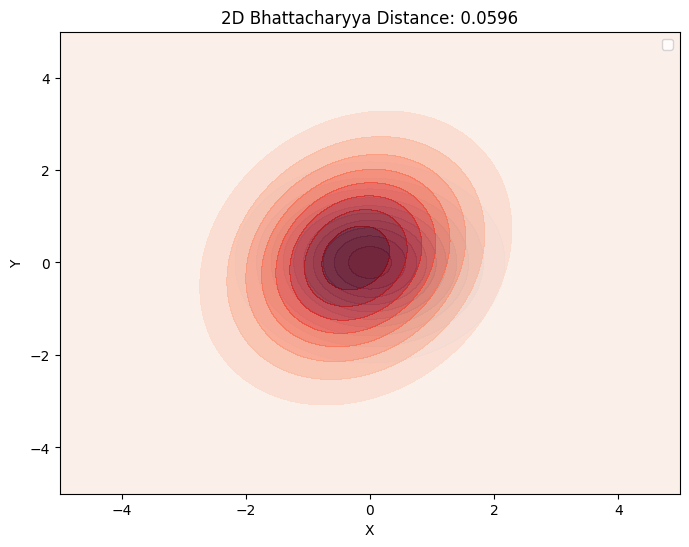

Closest distance to 0.5: 0.0007 (achieved distance: 0.4993)


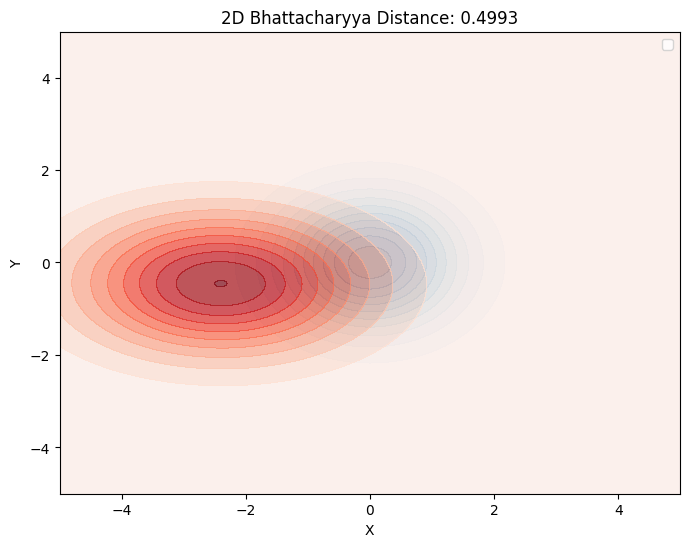

Closest distance to 10.0: 8.4496 (achieved distance: 1.5504)


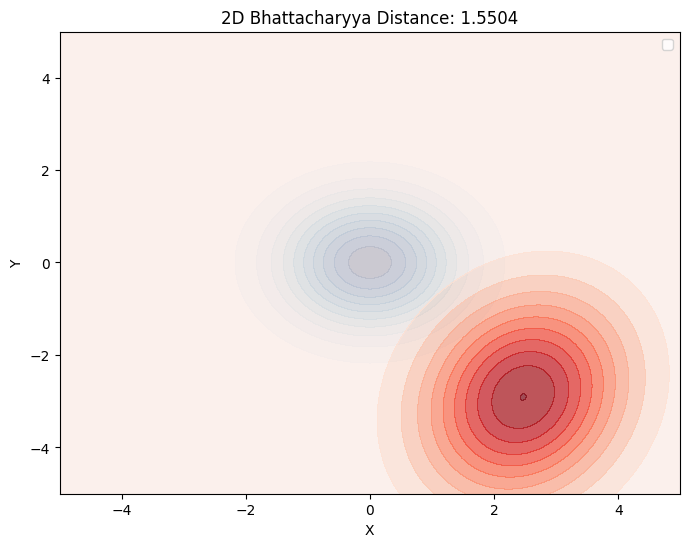

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# ... (bhattacharyya_distance_2d_normal_discretized function remains the same)

# Target distances (for demonstration)
target_distances = [0, 0.5, 10.0]  # Example: <0.5, ~0.5, >0.5

for target_distance in target_distances:
    best_mean2 = None
    best_cov2 = None
    min_diff = float('inf')

    for i in range(100):  # Try different configurations (adjust range as needed)
        # Vary mean2 and cov2 randomly (you'll need to adjust the ranges)
        mean2 = np.array([np.random.uniform(-3, 3), np.random.uniform(-3, 3)])  # Adjust range
        cov2 = np.array([[np.random.uniform(0.5, 3), np.random.uniform(-0.5, 0.5)],
                         [np.random.uniform(-0.5, 0.5), np.random.uniform(0.5, 3)]]) # Adjust range and ensure positive definite

        # Ensure positive definite covariance matrix (important!)
        cov2 = (cov2 + cov2.T) / 2  # Make symmetric
        eigenvalues, eigenvectors = np.linalg.eig(cov2)
        eigenvalues = np.maximum(eigenvalues, 0.1) # Ensure eigenvalues are positive
        cov2 = eigenvectors @ np.diag(eigenvalues) @ eigenvectors.T


        distance = bhattacharyya_distance_2d_normal_discretized(mean1, cov1, mean2, cov2, grid_size=200)

        diff = abs(distance - target_distance)
        if diff < min_diff:
            min_diff = diff
            best_mean2 = mean2
            best_cov2 = cov2
            best_distance = distance # Update best distance

    print(f"Closest distance to {target_distance}: {min_diff:.4f} (achieved distance: {best_distance:.4f})")

    # Plot the best configuration found
    x, y = np.mgrid[-5:5:.01, -5:5:.01]
    pos = np.dstack((x, y))
    rv1 = multivariate_normal(mean1, cov1)
    rv2 = multivariate_normal(best_mean2, best_cov2) # Use the best mean2 and cov2

    plt.figure(figsize=(8, 6))
    plt.contourf(x, y, rv1.pdf(pos), levels=10, cmap="Blues", alpha=0.7, label="Distribution 1")
    plt.contourf(x, y, rv2.pdf(pos), levels=10, cmap="Reds", alpha=0.7, label="Distribution 2")
    plt.title(f"2D Bhattacharyya Distance: {best_distance:.4f}")  # Use best_distance in title
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.show()


# N-dimensional case

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def bhattacharyya_distance_nd_normal_discretized(mean1, cov1, mean2, cov2, grid_size=50): #Adjust grid_size as needed
    """Approximates Bhattacharyya distance for n-D normal distributions."""

    n = len(mean1) # Get the number of dimensions

    # Define the range for each dimension (example)
    ranges = []
    for i in range(n):
        min_val = min(mean1[i], mean2[i]) - 5 * max(np.sqrt(cov1[i, i]), np.sqrt(cov2[i, i]))
        max_val = max(mean1[i], mean2[i]) + 5 * max(np.sqrt(cov1[i, i]), np.sqrt(cov2[i, i]))
        ranges.append((min_val, max_val))

    # Create the N-dimensional grid
    grids = [np.linspace(r[0], r[1], grid_size) for r in ranges]
    mesh = np.meshgrid(*grids, indexing='ij')  # Important for correct order
    pos = np.stack(mesh, axis=-1)  # Shape (grid_size, grid_size, ..., n)

    rv1 = multivariate_normal(mean1, cov1)
    rv2 = multivariate_normal(mean2, cov2)

    p = rv1.pdf(pos)
    q = rv2.pdf(pos)

     # Calculate the "volume" of each grid cell
    cell_volume = np.prod([g[1] - g[0] for g in grids])

    p_discrete = p * cell_volume
    q_discrete = q * cell_volume

    p_discrete = p_discrete / np.sum(p_discrete)
    q_discrete = q_discrete / np.sum(q_discrete)

    p_flat = p_discrete.flatten()
    q_flat = q_discrete.flatten()

    epsilon = 1e-10
    p_flat = np.array(p_flat) + epsilon
    q_flat = np.array(q_flat) + epsilon

    bc = np.sum(np.sqrt(p_flat * q_flat))
    return -np.log(bc)





3D Bhattacharyya Distance (Discretized): 0.3383
2D Bhattacharyya Distance (Discretized): 0.2255


3D Bhattacharyya Distance (Discretized): 0.3383


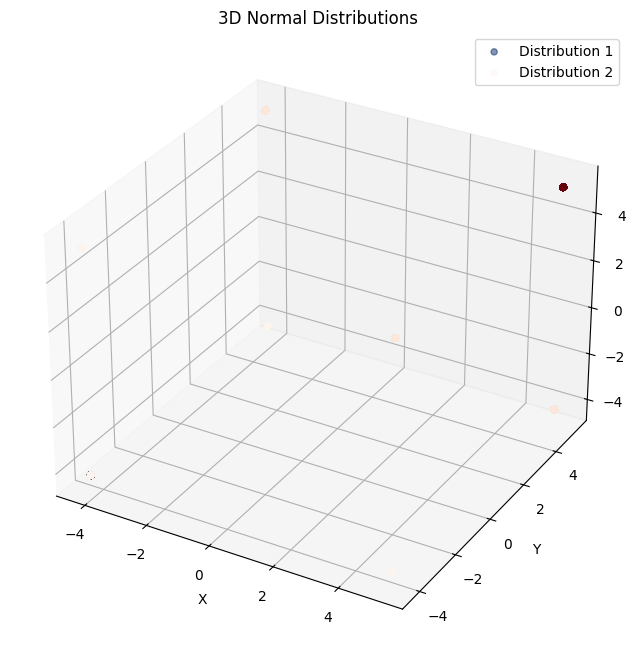

In [17]:
# Example for 3D:
mean1 = np.array([0, 0, 0])
cov1 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
mean2 = np.array([1, 1, 1])
cov2 = np.array([[2, 0, 0], [0, 2, 0], [0, 0, 2]])

distance = bhattacharyya_distance_nd_normal_discretized(mean1, cov1, mean2, cov2, grid_size=30) #Adjust grid_size

print(f"3D Bhattacharyya Distance (Discretized): {distance:.4f}")


# Create the grid for plotting (using a smaller grid for visualization)
grid_size_plot = 20  # Adjust as needed
ranges = []
for i in range(3):  # 3 dimensions
    min_val = min(mean1[i], mean2[i]) - 3 * max(np.sqrt(cov1[i, i]), np.sqrt(cov2[i, i]))
    max_val = max(mean1[i], mean2[i]) + 3 * max(np.sqrt(cov1[i, i]), np.sqrt(cov2[i, i]))
    ranges.append((min_val, max_val))
grids = [np.linspace(r, r, grid_size_plot) for r in ranges]
X, Y, Z = np.meshgrid(*grids, indexing='ij')
pos = np.stack([X, Y, Z], axis=-1)

rv1 = multivariate_normal(mean1, cov1)
rv2 = multivariate_normal(mean2, cov2)
p1 = rv1.pdf(pos)
p2 = rv2.pdf(pos)

# Create the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for distribution 1
ax.scatter(X, Y, Z, c=p1, cmap='Blues', alpha=0.5, label="Distribution 1")

# Scatter plot for distribution 2
ax.scatter(X, Y, Z, c=p2, cmap='Reds', alpha=0.5, label="Distribution 2")

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("3D Normal Distributions")
plt.legend()
plt.show()
